# Biased coexistence simulations for ice IV
### 2056 molecules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.optimize import curve_fit
import os.path
from matplotlib.patches import Ellipse

In [2]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
#plt.rc('text', usetex=False)
plt.rcParams['figure.figsize'] = (15, 10)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

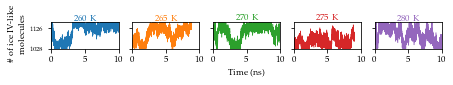

In [17]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (7, 0.5)

pressures=np.array([2500])
temps=np.array([260,265,270,275,280])
press=pressures[0]

fig, axs = plt.subplots(1,temps.shape[0],sharex=True,sharey=True)

counter2=0
for temp in temps:
    file='IceIV-' + str(temp) + ".0-" + str(press) + '.0/COLVAR.0'
    axs[counter2].set_ylim([1028,1156])
    axs[counter2].set_xlim([0,10])
    axs[counter2].set_yticks([1028,1126])
    axs[counter2].tick_params(axis='y', which='major', labelsize=7)
    if(os.path.exists(file)):
        data = np.genfromtxt(file)
        axs[counter2].plot(data[:,0]/1000,data[:,1],color=colors[counter2],linewidth=0.5)
    counter2 += 1
    #axs[0].text(5,1170,str(pressures[0]/10000)+ ' GPa',va='center',ha='center')

for i in range(temps.shape[0]):
    axs[i].text(5,1170,str(temps[i])+ ' K',va='center',ha='center',color=colors[i])

#axs[int(temps.shape[0]/2)].xaxis.set_label_coords(-0.075, -1.6)
axs[2].set_xlabel("Time (ns)") #,labelpad=5)

#axs[temps.shape[0]-1,int(pressures.shape[0]/2)].xaxis.set_label_coords(-0.075, -1.6)

axs[0].set_ylabel("\# of ice IV-like \n molecules")

#plt.tight_layout()
plt.savefig("1-traj-IV-large.pdf",bbox_inches='tight')  # publication quality

plt.show()

<ipython-input-28-fa7b9e7386aa>:40: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-28-fa7b9e7386aa>:46: RuntimeWarning: invalid value encountered in true_divide
  feserr = err/histo
<ipython-input-28-fa7b9e7386aa>:40: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-28-fa7b9e7386aa>:46: RuntimeWarning: invalid value encountered in true_divide
  feserr = err/histo


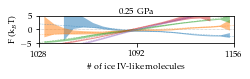

In [28]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 0.5)

pressures=np.array([2500])
temps=np.array([260,265,270,275,280])
press=pressures[0]

def func(x,a,b):
    return a*x+b

fig, axs = plt.subplots(1,1,sharex=True,sharey=True)

counter2=0
for temp in temps:
    file='IceIV-' + str(temp) + ".0-" + str(press) + '.0/COLVAR.0'
    if(os.path.exists(file)):
        data = np.genfromtxt(file)
        ignore=int(data.shape[0]/4)
        bias= data[ignore:,3]
        cv=data[ignore:,1]
        if (cv.shape[0]>0):
            beta=1./(0.00831441001626*temp)
            logweights=beta*bias
            logweights -= np.amax(logweights)
            nbins=20
            histmin=1028
            histmax=1156
            histo, bin_edges = np.histogram(cv,weights=np.exp(logweights),bins=nbins,range=(histmin,histmax))
            err = np.sqrt(np.histogram(cv,weights=np.power(np.exp(logweights),2),bins=nbins,range=(histmin,histmax))[0])
            bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
            fes = -np.log(histo)
            offset = np.mean(np.ma.masked_invalid(fes))
            fes -= offset
            axs.set_xlim([histmin,histmax])
            axs.set_xticks([1028,1092,1156])
            axs.set_ylim([-5,5])
            feserr = err/histo
            axs.fill_between(bin_centers,fes-10*feserr,fes+10*feserr,color=colors[counter2],linewidth=0,alpha=0.5)
        if (fes[np.isfinite(fes)].shape[0]>0):
            popt, pcov = curve_fit(func, bin_centers[np.isfinite(fes)], fes[np.isfinite(fes)], sigma=2*feserr[np.isfinite(fes)])
            x=np.linspace(histmin,histmax,10)
            axs.plot(x,func(x,*popt),'--',alpha=0.5,color=colors[counter2],linewidth=0.5)
    counter2 += 1
axs.plot([histmin,histmax],[0,0],':',alpha=0.5,color='black',zorder=0,linewidth=0.5)
    
axs.text(1092,6.6,str(press/10000)+ ' GPa',va='center',ha='center')
    
#axs[int(pressures.shape[0]/2)].xaxis.set_label_coords(-0.075, -0.6)
axs.set_xlabel(r"\# of ice IV-like molecules")
axs.set_ylabel("F (k$_B$T)")

plt.savefig("2-fes-IV-large.pdf",bbox_inches='tight')  # publication quality

plt.show()

<ipython-input-27-fd9562cc5aee>:48: RuntimeWarning: divide by zero encountered in log
  fes = -np.log(histo)
<ipython-input-27-fd9562cc5aee>:51: RuntimeWarning: invalid value encountered in true_divide
  feserr = err/histo


[262.71769062] [2500.] [3.64012104]


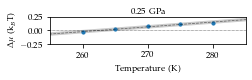

In [27]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 0.5)

pressures=np.array([2500])
temps=np.array([260,265,270,275,280])
press=pressures[0]

def func(x,a,b):
    return a*x+b

def func2(x,a,x0):
    return a*(x-x0)

fig, axs = plt.subplots(1,1,sharex=True,sharey=True)

counter2=0
melt_temp=np.zeros(0)
melt_temp_errors=np.zeros(0)
melt_temp_pressures=np.zeros(0)
chem_pot=np.zeros(0)
chem_pot_temps=np.zeros(0)
for temp in temps:
    file='IceIV-' + str(temp) + ".0-" + str(press) + '.0/COLVAR.0'
    if(os.path.exists(file)):
        data = np.genfromtxt(file)
        ignore=int(data.shape[0]/4)
        bias= data[ignore:,3]
        cv=data[ignore:,1]
        if (cv.shape[0]>0):
            beta=1./(0.00831441001626*temp)
            logweights=beta*bias
            logweights -= np.amax(logweights)
            nbins=20
            histmin=1028
            histmax=1156
            histo, bin_edges = np.histogram(cv,weights=np.exp(logweights),bins=nbins,range=(histmin,histmax))
            err = np.sqrt(np.histogram(cv,weights=np.power(np.exp(logweights),2),bins=nbins,range=(histmin,histmax))[0])
            bin_centers = (bin_edges[1:]+bin_edges[:-1])/2
            fes = -np.log(histo)
            offset = np.mean(np.ma.masked_invalid(fes))
            fes -= offset
            feserr = err/histo
            popt, pcov = curve_fit(func, bin_centers[np.isfinite(fes)], fes[np.isfinite(fes)], sigma=2*feserr[np.isfinite(fes)])
            chem_pot=np.insert(chem_pot,0,popt[0])
            chem_pot_temps=np.insert(chem_pot_temps,0,temp)
            axs.scatter(temp,popt[0],s=10,color=colors[0])
    counter2 += 1
    axs.plot([255,285],[0,0],':',color='black',alpha=0.25,zorder=0,linewidth=0.5)
    axs.set_xlim([255,285])
    axs.set_xticks([260,270,280])
    axs.set_ylim([-0.25,0.25])
if (chem_pot_temps.shape[0]>0):
    popt, pcov = curve_fit(func2, chem_pot_temps, chem_pot, sigma=np.ones(chem_pot.shape[0])*0.05, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    x=np.linspace(temps[0]-10,temps[-1]+10,10)
    axs.plot(x,func2(x,*popt),'--',color='black',alpha=0.5,linewidth=0.75)
    melt_temp=np.insert(melt_temp,0,popt[1])
    melt_temp_pressures=np.insert(melt_temp_pressures,0,press)
    melt_temp_errors=np.insert(melt_temp_errors,0,perr[1])
    axs.fill_between(x,func2(x,popt[0],popt[1]-perr[1]),func2(x,popt[0],popt[1]+perr[1]),linewidth=0.,color='black',alpha=0.2,zorder=0)
    
print(melt_temp,melt_temp_pressures,melt_temp_errors)

axs.text(270,0.35,str(press/10000)+ ' GPa',va='center',ha='center')
    

axs.set_xlabel("Temperature (K)")
axs.set_ylabel("$\Delta\mu$ (k$_B$T)")

plt.savefig("3-deltamu-IV-large.pdf",bbox_inches='tight')  # publication quality

plt.show()

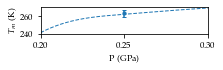

In [30]:
from scipy.interpolate import interp1d, UnivariateSpline

font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3., 0.5)

plt.errorbar(melt_temp_pressures/10000,melt_temp,melt_temp_errors, ls='none',capsize=2)
plt.scatter(melt_temp_pressures/10000,melt_temp,s=10)

thermo = np.genfromtxt("../../../../../ClausiusClapyeron/Results/thermo_condition_iceIV.txt")
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.2,0.3,1000)
plt.plot(x,f_spline(x),'--',color=colors[0],linewidth=1)

    
plt.xlabel("P (GPa)")
plt.ylabel("$T_m$ (K)")
plt.xticks([0.2,0.25,0.3])
plt.xlim([0.2,0.3])

plt.savefig("4-meltingcurve-IV-large.pdf",bbox_inches='tight')  # publication quality

plt.show()

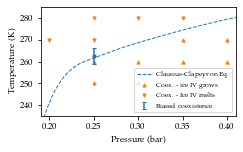

In [49]:
font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif',
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 9}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (3.5, 2.)

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

Tgrow = np.array([250,250,250,260,260,260,260,270,270])
Pgrow = np.array([2500,3000,3500,2500,3000,3500,4000,3500,4000])
Tmelt = np.array([270,270,280,280,280])
Pmelt = np.array([2000,2500,2500,3000,3500])
Tcoexist=np.array([265,270,275])
Pcoexist=np.array([2500,3000,3500])

plt.scatter(Pgrow/10000,Tgrow,marker='^',color=colors[1],label="Coex. - ice IV grows",s=10)
plt.scatter(Pmelt/10000,Tmelt,marker='v',color=colors[1],label="Coex. - Ice IV melts",s=10)

plt.errorbar(melt_temp_pressures/10000,melt_temp,melt_temp_errors, ls='none',capsize=2,label="Biased coexistence")
plt.scatter(melt_temp_pressures/10000,melt_temp,s=10)

thermo = np.genfromtxt("../../../../../ClausiusClapyeron/Results/thermo_condition_iceIV.txt")
f_spline = interp1d(thermo[:,0]/10000,thermo[:,1], kind='cubic',bounds_error=False,fill_value='extrapolate')
x=np.linspace(0.19,0.41,1000)
plt.plot(x,f_spline(x),'--',color=colors[0],linewidth=1,label="Clausius-Clapeyron Eq.")

plt.xlabel("Pressure (bar)")
plt.ylabel("Temperature (K)")
plt.xlim([0.19,0.41])
plt.ylim([235,285])
plt.legend(fontsize=7)

plt.savefig("std-coexistence-IV-large.pdf",bbox_inches='tight')  # publication quality

plt.show()